# 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
tf.keras.utils.set_random_seed(42)
# 실행마다 동일한 결과를 얻기 위해
# 케라스에 랜덤 시드를 사용하고
# 텐서플로 연산을 결정적으로 만듭니다.

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
    # 데이터셋을 다운하고 훈려노가 테스트 데이터로 분류

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# 입력 데이터의 차원을 (60000, 28, 28)에서 (60000, 28, 28, 1)로 변경합니다.
# 마지막 차원 1은 이미지가 흑백임을 나타냅니다.
# 원래 픽셀 값은 0부터 255까지 범위를 가지므로
# 255로 나누는건 픽셀 값을 0과 1 사이의 값으로 정규화


train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
train_scaled.shape

(48000, 28, 28, 1)

In [5]:
train_target.shape

(48000,)

In [6]:
import matplotlib.pyplot as plt

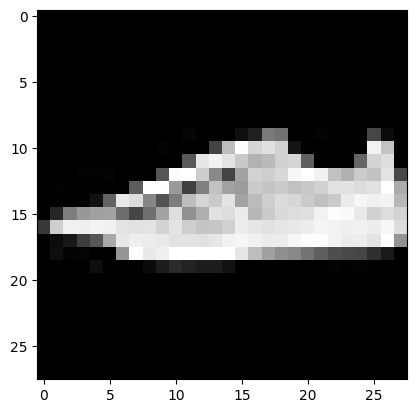

In [7]:
plt.imshow(train_scaled[0], 'gray')
plt.show()

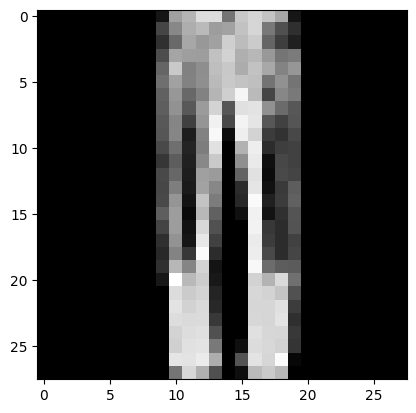

In [8]:
plt.imshow(train_scaled[-1], 'gray')
plt.show()

In [9]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

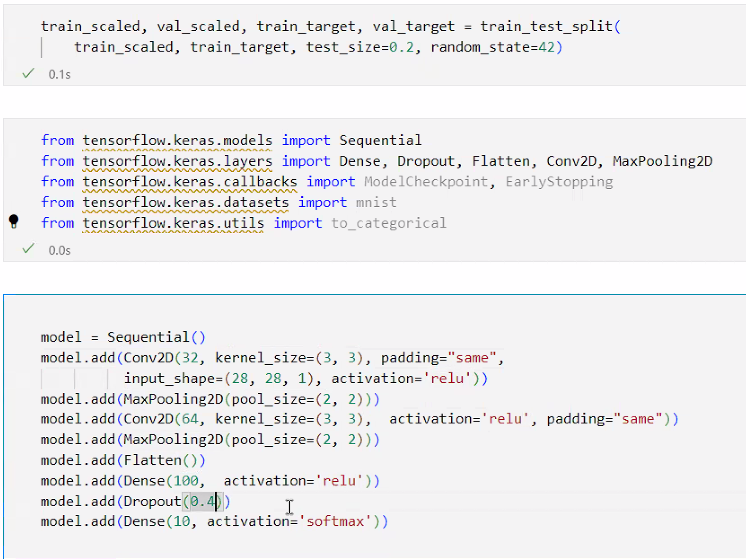

## 합성곱 신경망 만들기 

In [11]:
model = keras.Sequential()

In [12]:
model.add(keras.layers.Conv2D(32, # 컨볼루션 레이어에서 사용할 필터, 즉 커널의 개수
                              kernel_size=3, # 커널의 크기 설정
                              activation='relu', 
                              padding='same', # 입력과 출력의 공간 차원이 동일하게 유지된다
                              input_shape=(28,28,1))) # 입력 데이터의 형태 정의

c:\ProgramData\anaconda3\envs\test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(keras.layers.MaxPooling2D(2)) # 풀링 윈도우의 크기 설정

# MaxPooling2D
# 2D 풀링 레이어
# 입력된 특성 맵에서 최대값을 추출하여 출력합니다
# 공간적 차원을 줄여 모델의 계산량을 줄이고, 특징 추출의 중요한 부분만을 보존합니다

In [14]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [15]:
model.add(keras.layers.Flatten())
# 투디 맵을 1d 벡터로 변환

model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dropout(0.4))
# 훈련 중에 무작위로 40 퍼센트의 뉴런을 비활성화
# 과적합 방지
# 모델의 일반화 성능 개선

model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
! pyp install pydot
! pyp install graphviz

'pyp'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'pyp'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


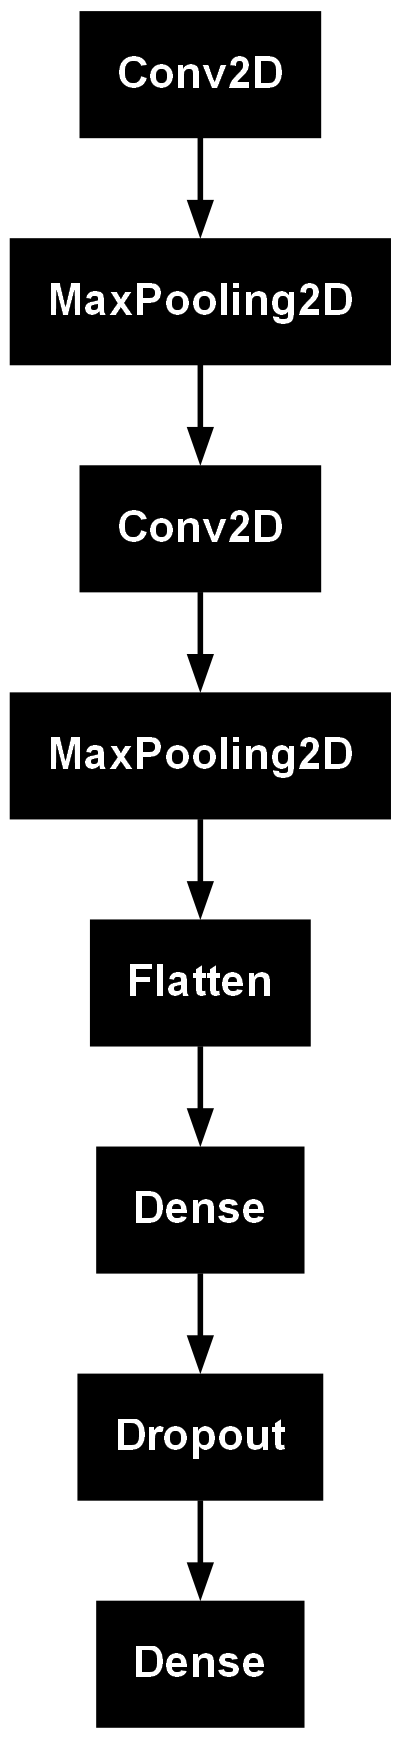

In [19]:
keras.utils.plot_model(model)

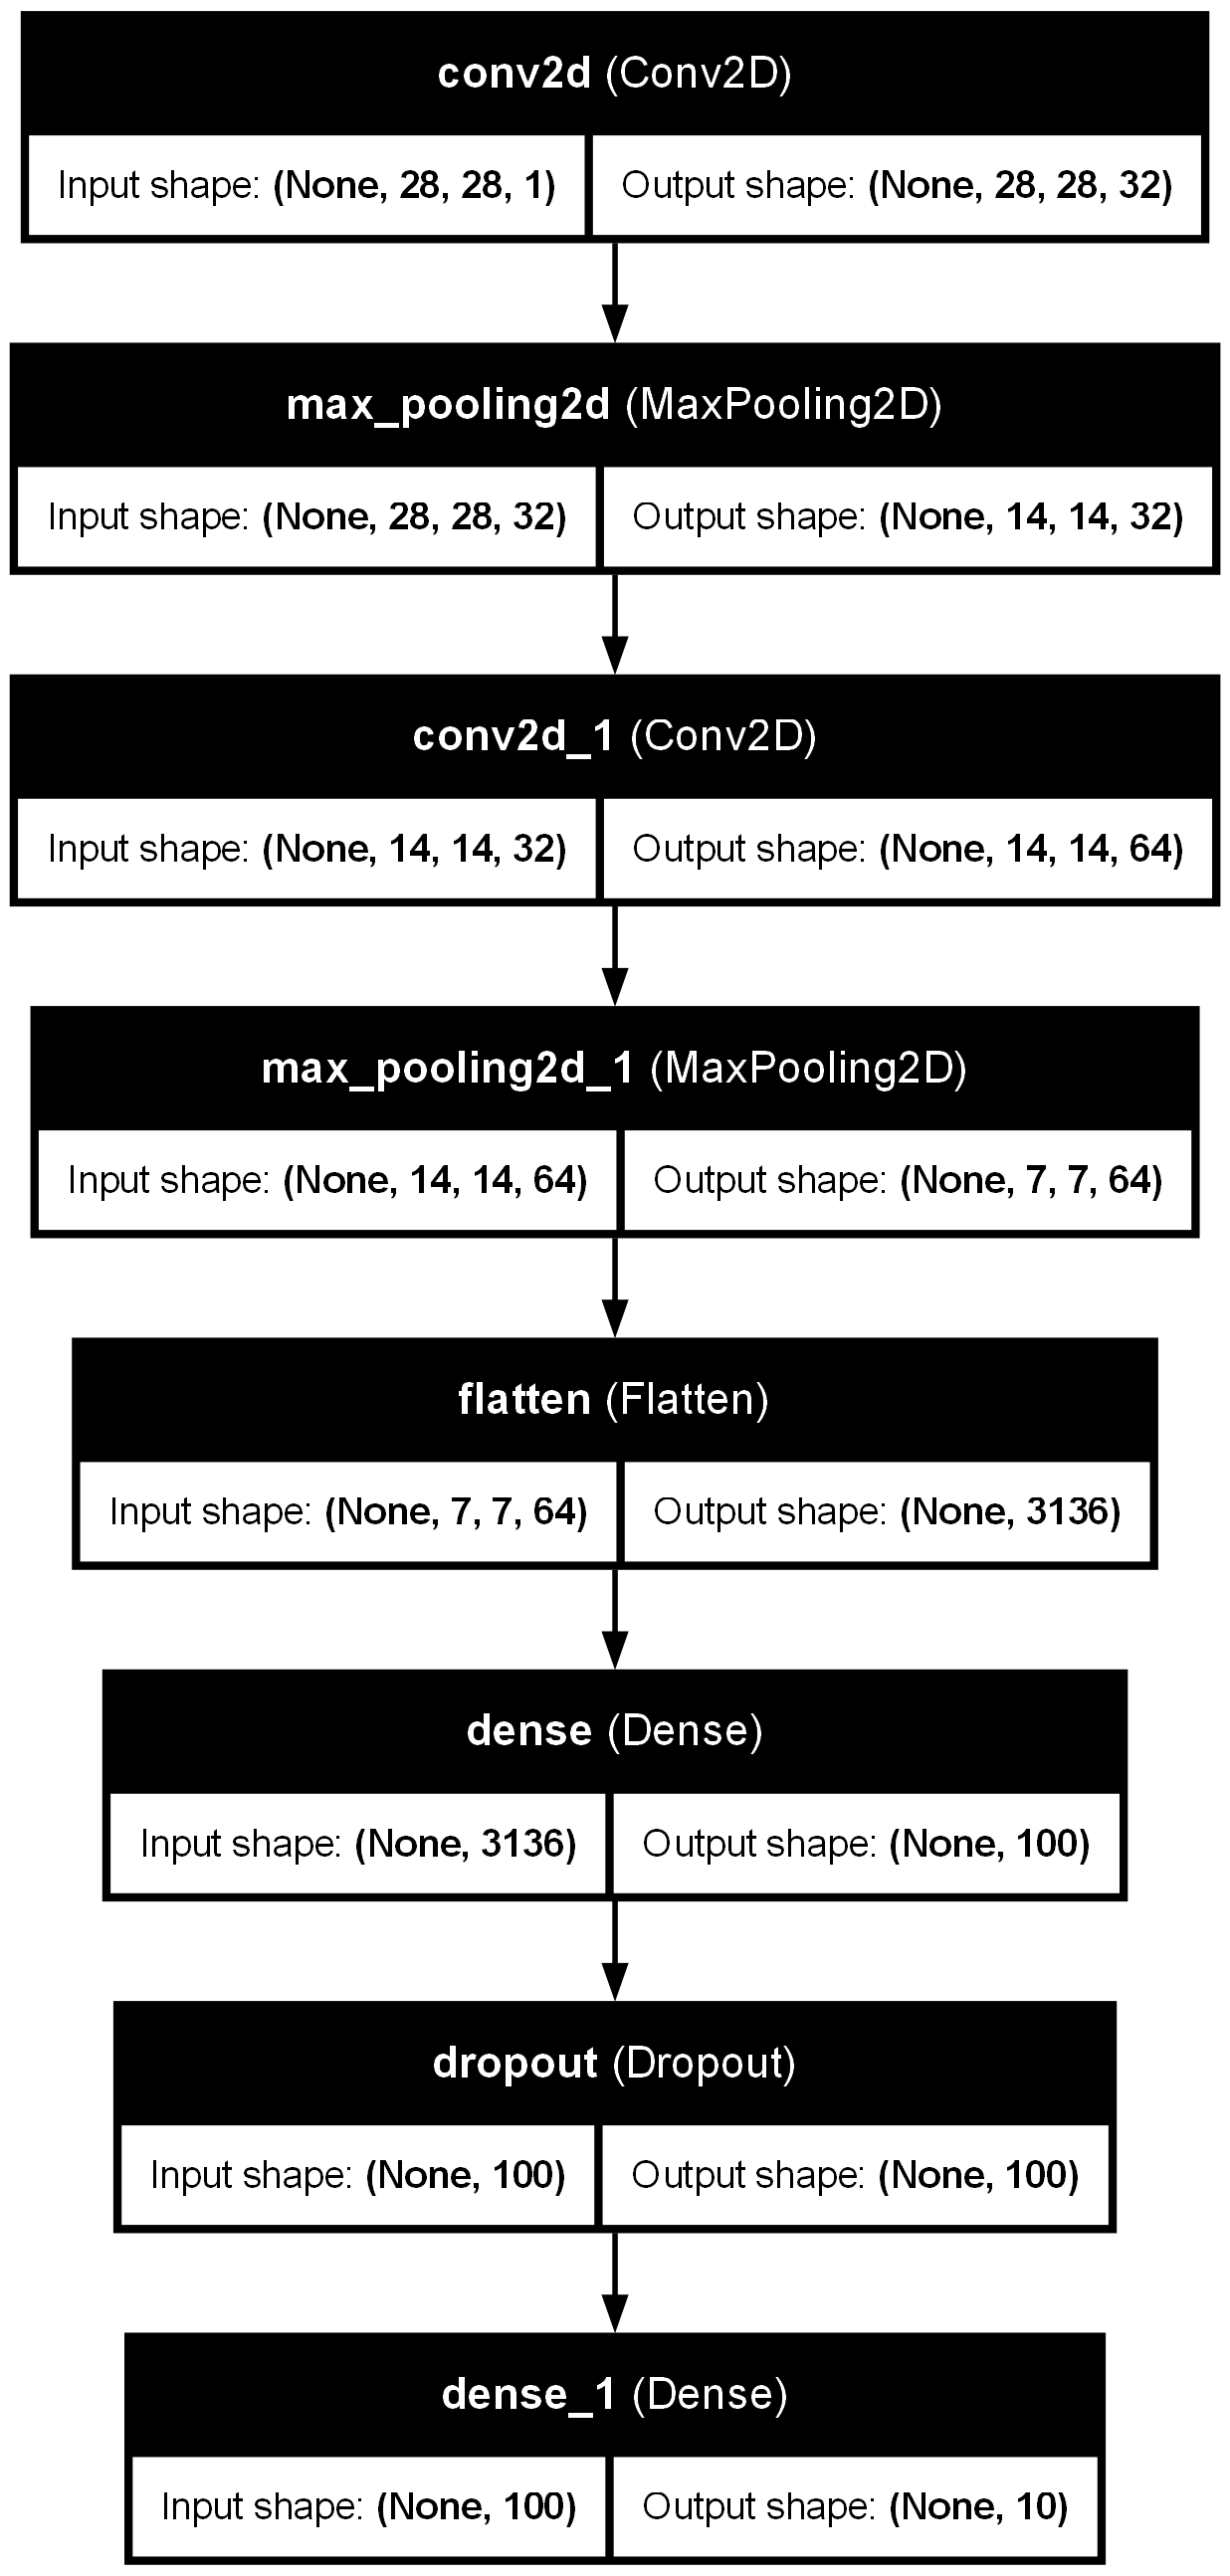

In [20]:
keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

`sparse_categorical_crossentropy`와 일반적인 `categorical_crossentropy`는 모두 딥러닝 모델에서 분류 문제를 해결할 때 사용되는 손실 함수입니다. 이 두 가지 손실 함수는 주로 다중 클래스 분류 문제에서 사용되며, 각각의 차이점은 주로 **타겟 레이블의 표현 방식**에서 나타납니다.

### 1. **Categorical Crossentropy**
   - **타겟 레이블 표현**: 이 방식은 **원-핫 인코딩(One-Hot Encoding)**된 레이블을 사용합니다. 원-핫 인코딩은 클래스 수만큼의 길이를 가지는 벡터로, 정답 클래스 위치에만 1이 있고 나머지는 0인 벡터입니다.
     - 예를 들어, 클래스가 3개(0, 1, 2) 있는 문제에서 정답이 클래스 2라면, 레이블은 `[0, 0, 1]`로 표현됩니다.
   - **사용**: 이 방법은 모델의 출력도 원-핫 인코딩된 확률 벡터일 때 주로 사용됩니다. 모델의 출력과 타겟 레이블의 각 클래스에 대한 확률을 비교하여 손실을 계산합니다.

### 2. **Sparse Categorical Crossentropy**
   - **타겟 레이블 표현**: 이 방식은 **정수 인코딩(Integer Encoding)**된 레이블을 사용합니다. 여기서 타겟 레이블은 단일 정수 값으로 표현됩니다.
     - 예를 들어, 클래스가 3개(0, 1, 2) 있는 문제에서 정답이 클래스 2라면, 레이블은 단순히 `2`로 표현됩니다.
   - **사용**: 이 방법은 모델의 출력이 원-핫 인코딩된 확률 벡터일 때, 타겟 레이블이 정수로 인코딩된 경우에 사용됩니다. `categorical_crossentropy`와 동일한 방식으로 손실을 계산하지만, 타겟 레이블이 정수로 표현된다는 점이 다릅니다.

### 차이점 요약
- **타겟 레이블 표현 방식**: 
  - `categorical_crossentropy`: 원-핫 인코딩된 타겟 레이블 사용.
  - `sparse_categorical_crossentropy`: 정수 인코딩된 타겟 레이블 사용.
  
- **모델 출력**: 두 손실 함수 모두 모델 출력은 원-핫 인코딩된 확률 벡터로 가정합니다. 즉, 출력층이 `softmax`를 통해 각 클래스에 대한 확률을 출력하는 구조일 때 사용됩니다.

- **사용 편의성**: `sparse_categorical_crossentropy`는 원-핫 인코딩 없이 정수 인코딩만으로 손쉽게 다중 클래스 분류 문제를 해결할 수 있도록 도와줍니다. 데이터셋이 큰 경우, 원-핫 인코딩을 수행하지 않아도 되기 때문에 메모리 효율성도 높아집니다.

### 사용 예시

- **categorical_crossentropy**:
  ```python
  # 원-핫 인코딩된 타겟 레이블 예시
  y_true = [[0, 0, 1], [0, 1, 0]]
  ```

- **sparse_categorical_crossentropy**:
  ```python
  # 정수 인코딩된 타겟 레이블 예시
  y_true = [2, 1]
  ```

### 결론

두 방법 모두 다중 클래스 분류 문제를 해결하는 데 사용되지만, 데이터셋의 레이블 표현 방식에 따라 선택해야 합니다. `sparse_categorical_crossentropy`는 정수 레이블을 사용하기 때문에 원-핫 인코딩을 사용하지 않아도 된다는 점에서 코드가 더 간단하고 메모리 사용이 줄어드는 장점이 있습니다.

In [22]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

In [23]:
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7401 - loss: 0.7249 - val_accuracy: 0.8768 - val_loss: 0.3299
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8689 - loss: 0.3653 - val_accuracy: 0.8978 - val_loss: 0.2842
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8873 - loss: 0.3083 - val_accuracy: 0.9065 - val_loss: 0.2563
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8991 - loss: 0.2757 - val_accuracy: 0.9122 - val_loss: 0.2407
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9061 - loss: 0.2525 - val_accuracy: 0.9123 - val_loss: 0.2350
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9145 - loss: 0.2295 - val_accuracy: 0.9147 - val_loss: 0.2299
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9181 - loss: 0.2166 - val_accuracy: 0.9194 - val_loss: 0.2277
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9247 - loss: 0

In [24]:
import matplotlib.pyplot as plt

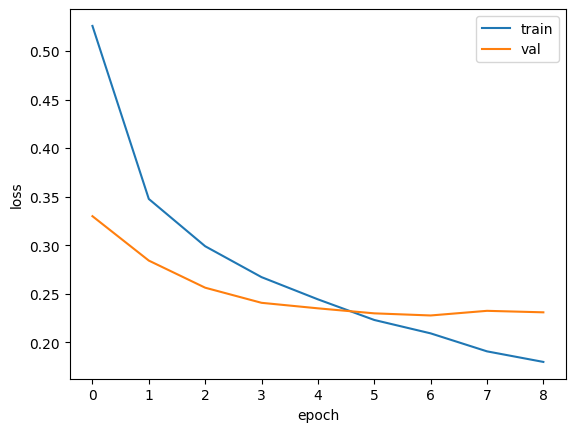

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9212 - loss: 0.2244


[0.22768250107765198, 0.9194166660308838]

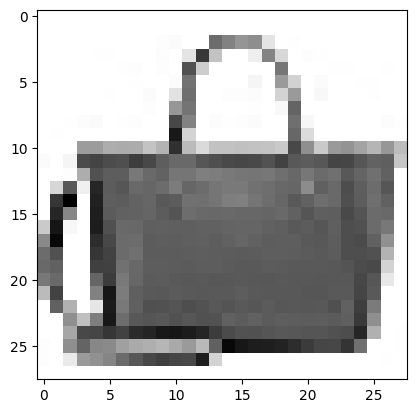

In [27]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [28]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[1.0993980e-19 6.8800582e-30 7.2437127e-21 1.3013915e-18 1.0043184e-18
  4.6863119e-18 1.3482952e-20 1.1513068e-19 1.0000000e+00 1.7339685e-20]]


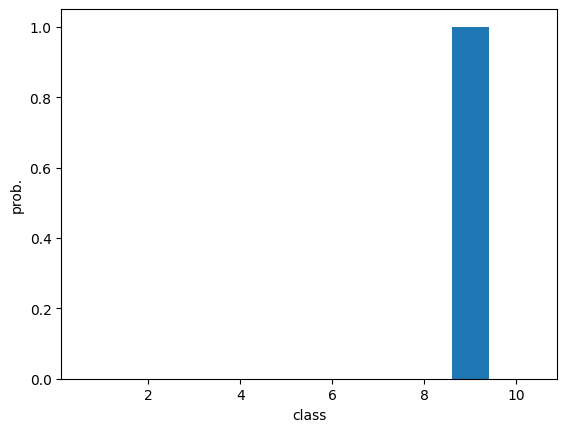

In [29]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [30]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [31]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [32]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [33]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.2689


[0.25661441683769226, 0.9106000065803528]